In [145]:
import numpy as np
import matplotlib.pyplot as plt


In [146]:
class Logistic_Binary:
    def __init__(self, X_test, y_test, X_train, y_train, alpha=0.01, max_iter=10):
        self.X_test = X_test
        self.y_test = y_test
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha
        self.max_iter = max_iter
        self.W = np.zeros(X_train.shape[1])
        self.b = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def predict(self, Z):
        hypothesis = self.sigmoid(Z)
        if hypothesis >= 0.5:
            return 1
        else:
            return 0
    
    def loss(self):
        m = self.X_train.shape[0]
        y_hat = self.sigmoid(np.dot(self.X_train, self.W) + self.b)
        loss = -1/m * np.sum(self.y_train * np.log(y_hat) + (1 - self.y_train) * np.log(1 - y_hat))
        return loss
    
    def accuracy(self):
        correct = 0
        for i in range(self.X_train.shape[0]):
            y_hat = self.predict(np.dot(self.X_train[i], self.W) + self.b)
            if y_hat == self.y_train[i]:
                correct += 1
        return correct / self.X_train.shape[0]
    
    def fit(self):
        m = self.X_train.shape[0]
        
        for epoch in range(self.max_iter):
            for i in range(m):
                x_i = self.X_train[i]
                # print(x_i)
                y_i = self.y_train[i]
                # print(y_i)
                z_i = np.dot(x_i, self.W) + self.b
                y_hat_i = self.predict(z_i)
                # print(y_hat_i)
                error_i = y_hat_i - y_i
                # print(error_i)
                self.W -= self.alpha * error_i * x_i
                # print(self.b)
                self.b -= self.alpha * error_i
                # print(self.b)
                
            # print(self.b.shape)
            loss = self.loss()
            accuracy = self.accuracy()
            print(f'Epoch {epoch + 1}\tLoss: {loss}\tAccuracy: {accuracy}')

        
        return self.W, self.b
    
    def test(self):
        correct = 0
        for i in range(self.X_test.shape[0]):
            y_hat = self.predict(np.dot(self.X_test[i], self.W) + self.b)
            if y_hat == self.y_test[i]:
                correct += 1
        print(f'Test Accuracy: {correct / self.X_test.shape[0]}')
        return correct / self.X_test.shape[0]
    

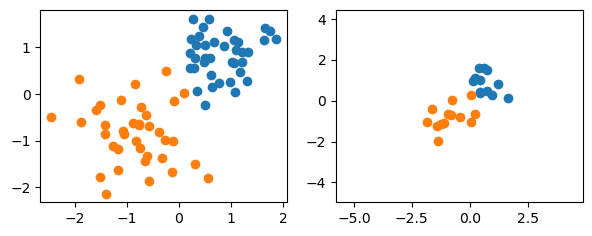

In [147]:
data = np.genfromtxt('C:\\Users\\dikss\\Capstone Projects\\Data-Science-Capstones\\Perceptron\\toydata.txt', delimiter='\t')
x = data[:, :2].astype(np.float32)
y = data[:, 2].astype(np.int64)

np.random.seed(123)
idx = np.arange(y.shape[0])
np.random.shuffle(idx)
X_test, y_test = x[idx[:25]], y[idx[:25]]
X_train, y_train = x[idx[25:]], y[idx[25:]]
mu, std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train, X_test = (X_train - mu) / std, (X_test - mu) / std

fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1])
ax[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1])
plt.xlim([x[:, 0].min()-0.5, x[:, 0].max()+0.5])
plt.ylim([x[:, 1].min()-0.5, x[:, 1].max()+0.5])
plt.show()

In [148]:
model = Logistic_Binary(X_test, y_test, X_train, y_train)
model.fit()
model.test()


Epoch 1	Loss: 0.6796091484143417	Accuracy: 0.9733333333333334
Epoch 2	Loss: 0.6764051796173143	Accuracy: 0.9733333333333334
Epoch 3	Loss: 0.6775284950581854	Accuracy: 1.0
Epoch 4	Loss: 0.6775284950581854	Accuracy: 1.0
Epoch 5	Loss: 0.6775284950581854	Accuracy: 1.0
Epoch 6	Loss: 0.6775284950581854	Accuracy: 1.0
Epoch 7	Loss: 0.6775284950581854	Accuracy: 1.0
Epoch 8	Loss: 0.6775284950581854	Accuracy: 1.0
Epoch 9	Loss: 0.6775284950581854	Accuracy: 1.0
Epoch 10	Loss: 0.6775284950581854	Accuracy: 1.0
Test Accuracy: 1.0


1.0

In [149]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, *, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'
    A scatter plot of *y* vs. *x* with varying marker size and/or color.

    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.

    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.

        The 

[0.02806303 0.01002134] -0.01
<class 'numpy.ndarray'> <class 'numpy.float64'>


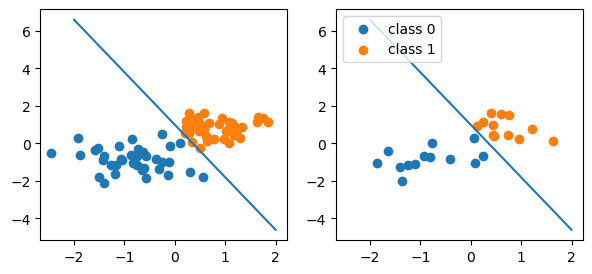

In [150]:
w, b = model.W, model.b

print(w, b)
print(type(w), type(b))

x_min = -2
y_min = ( (-(w[0] * x_min) - b) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])
# i want both the classes to be represented by circle only

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='o')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='o')

ax[1].legend(loc='upper left')
plt.show()